In [9]:
import io_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import random

In [10]:
datapath = '/Users/alan/Downloads/AOS99/Data/'
full = pd.read_csv('2009_2022CompleteMagPOLAR.csv')

In [11]:
date = '2013-06-10'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-cal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-cal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-vvelsLat-geo-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv(date+'.csv')

d1 = df2

In [12]:
# date = '2014-03-31'
# plaindate = date.replace('-',"")
# underdate = date.replace('-',"_")

# datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
# lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
# flp=io_utils.read_whole_h5file(lpfilename)

# #Alternating code data file
# acfilename=datadir+plaindate+'.001_ac_1min-fitcal.h5'
# fac=io_utils.read_whole_h5file(acfilename)

# #reconstructed vector velocities data file
# vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# v=io_utils.read_whole_h5file(vfilename)

# lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
# dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
# dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

# df = pd.read_csv(date+'.csv')

# indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
# indicies = indicies.drop(columns='Unnamed: 0')
# indicies = indicies.reset_index()

# vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
# ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

# magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
# magdicies = magdicies.reset_index()

# data = {
#     'index':indicies.index,
#     'Date':indicies['Date'],
#     'BZ_North':indicies['BZ_North'],
#     'Velocity_Latitude_n/s':vn,
#     'Velocity_Latitude_e/w':ve,
#     'Magnetometer_Magnitude':magdicies['rho'],
#     'Magnetometer_Theta':magdicies['theta'],
#     'Magnetometer_Phi':magdicies['phi'],
#     'Magnetometer_North':magdicies['dbn_nez'],
#     'Magnetometer_East':magdicies['dbe_nez'],
#     'Magnetometer_Z':magdicies['dbz_nez'],
#     'Labels':[0]*len(indicies['Date'])
# }
# df2 = pd.DataFrame(data)

# df2.to_csv(date+'.csv')

# d2 = df2

In [13]:
date = '2015-06-08'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv(date+'.csv')

d3 = df2

In [14]:
date = '2016-07-01'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.004_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.004_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.004_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv(date+'.csv')

d4 = df2

In [15]:
# date = '2017-04-27'
# plaindate = date.replace('-',"")
# underdate = date.replace('-',"_")

# datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
# lpfilename=datadir+plaindate+'.001_lp_1min-cal.h5'
# flp=io_utils.read_whole_h5file(lpfilename)

# #Alternating code data file
# acfilename=datadir+plaindate+'.001_ac_1min-cal.h5'
# fac=io_utils.read_whole_h5file(acfilename)

# #reconstructed vector velocities data file
# vfilename=datadir+plaindate+'.001_lp_1min-cal-vvelsLat-60sec.h5'
# v=io_utils.read_whole_h5file(vfilename)

# lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
# dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
# dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

# df = pd.read_csv(date+'.csv')

# indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
# indicies = indicies.drop(columns='Unnamed: 0')
# indicies = indicies.reset_index()

# vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
# ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

# magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
# magdicies = magdicies.reset_index()

# data = {
#     'index':indicies.index,
#     'Date':indicies['Date'],
#     'BZ_North':indicies['BZ_North'],
#     'Velocity_Latitude_n/s':vn,
#     'Velocity_Latitude_e/w':ve,
#     'Magnetometer_Magnitude':magdicies['rho'],
#     'Magnetometer_Theta':magdicies['theta'],
#     'Magnetometer_Phi':magdicies['phi'],
#     'Magnetometer_North':magdicies['dbn_nez'],
#     'Magnetometer_East':magdicies['dbe_nez'],
#     'Magnetometer_Z':magdicies['dbz_nez'],
#     'Labels':[0]*len(indicies['Date'])
# }
# df2 = pd.DataFrame(data)

# df2.to_csv(date+'.csv')

# d5 = df2

In [16]:
cols = ['Date',
    'BZ_North',
    'Velocity_Latitude_n/s',
    'Velocity_Latitude_e/w',
    'Magnetometer_Magnitude',
    'Magnetometer_Theta',
    'Magnetometer_Phi',
    # 'Magnetometer_North',
    # 'Magnetometer_East',
    # 'Magnetometer_Z',
    'Labels']

In [17]:
df = pd.read_csv('FullDataset.csv',usecols=cols)
df_2013_06_05_1 = df[0:2821]
df_2013_06_05_2 = df[2822:5451]

df_2014_09_11_1 = df[5452:7821]
df_2014_09_11_2 = df[7822:10727]

df_2015_06_22_1 = df[10728:13035]
df_2015_06_22_2 = df[13036:15342]

df_2016_06_23_1 = df[15343:18221]
df_2016_06_23_2 = df[18222:21099]

df_2016_08_02_1 = df[21100:23978]
df_2016_08_02_2 = df[23979:26856]

df_2017_05_17_1 = df[26857:28252]

df_original = df

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')


<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

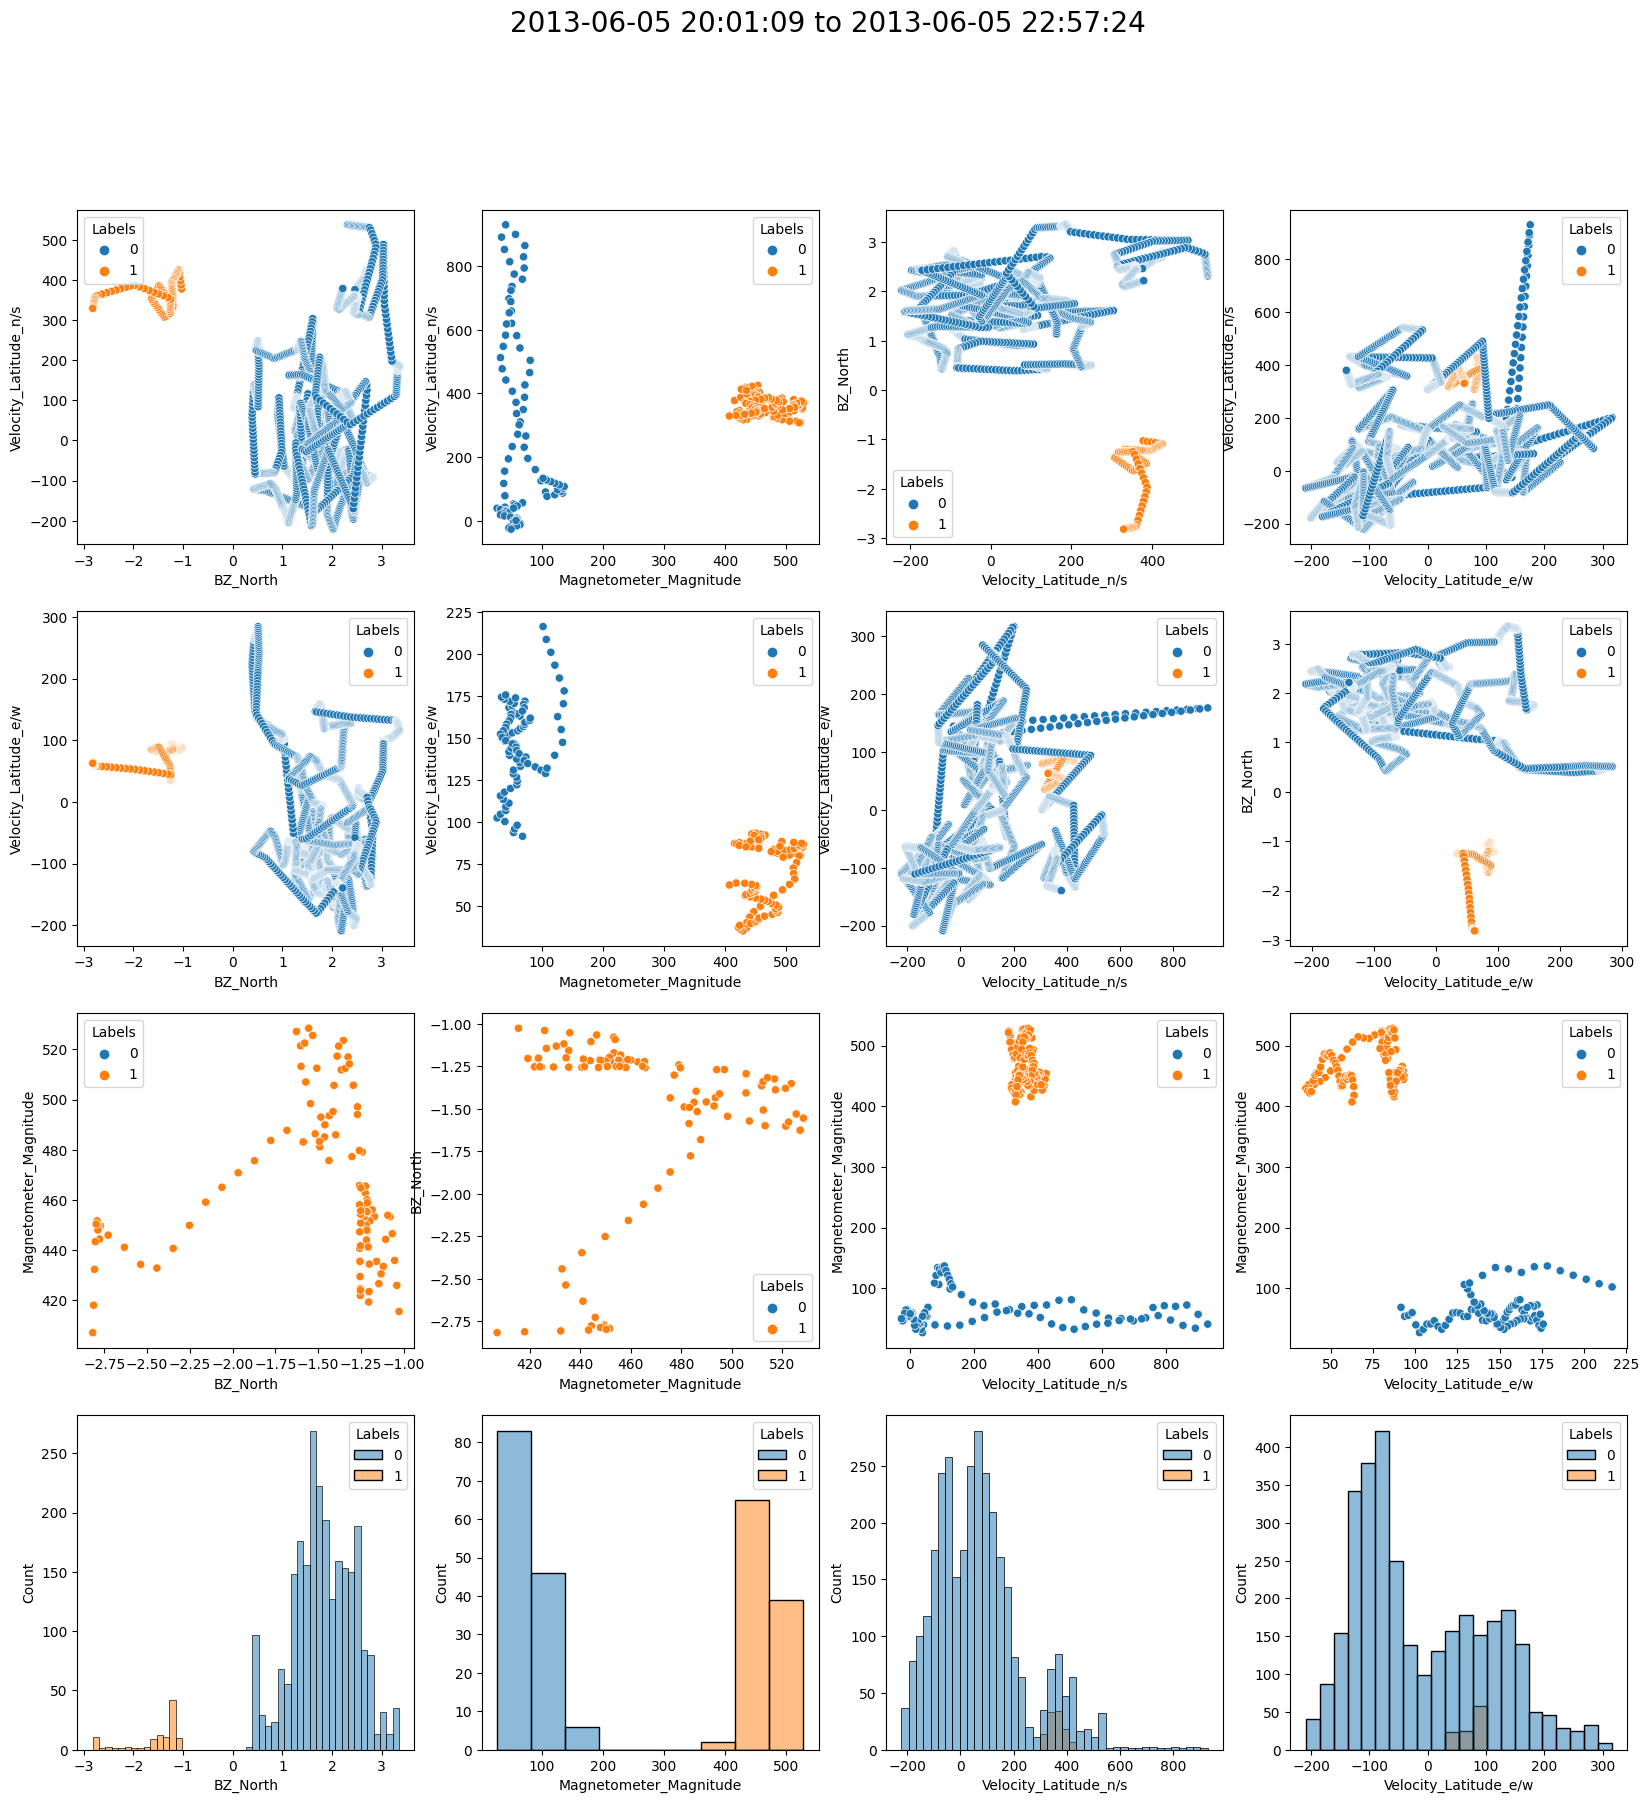

In [18]:
df = df_2013_06_05_1
df2 = pd.read_csv('2013-06-10.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],df2]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()
# sns.histplot(ax=axarr[0][0:3],data=df3,x='BZ_North',hue='Labels')
fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

In [19]:
# df = df_2014_09_11_1
# df2 = pd.read_csv('2014-03-31.csv',usecols=cols)
# print(df.columns)
# print(df2.columns)
# frames = [df[df['Labels']==1],df2]
# df3 = pd.concat(frames)
# print(df3.columns)
# df3 = df3.reset_index()
# # sns.histplot(ax=axarr[0][0:3],data=df3,x='BZ_North',hue='Labels')
# fig,axarr = plt.subplots(4,4,figsize=(20, 20))
# fig.suptitle(str(df2['Date'].iloc[0])[0:19]+' to ' + str(df2['Date'].iloc[-1])[0:19], fontsize=20)
# sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

# sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
# sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

# sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
# sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

# sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
# sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')


<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

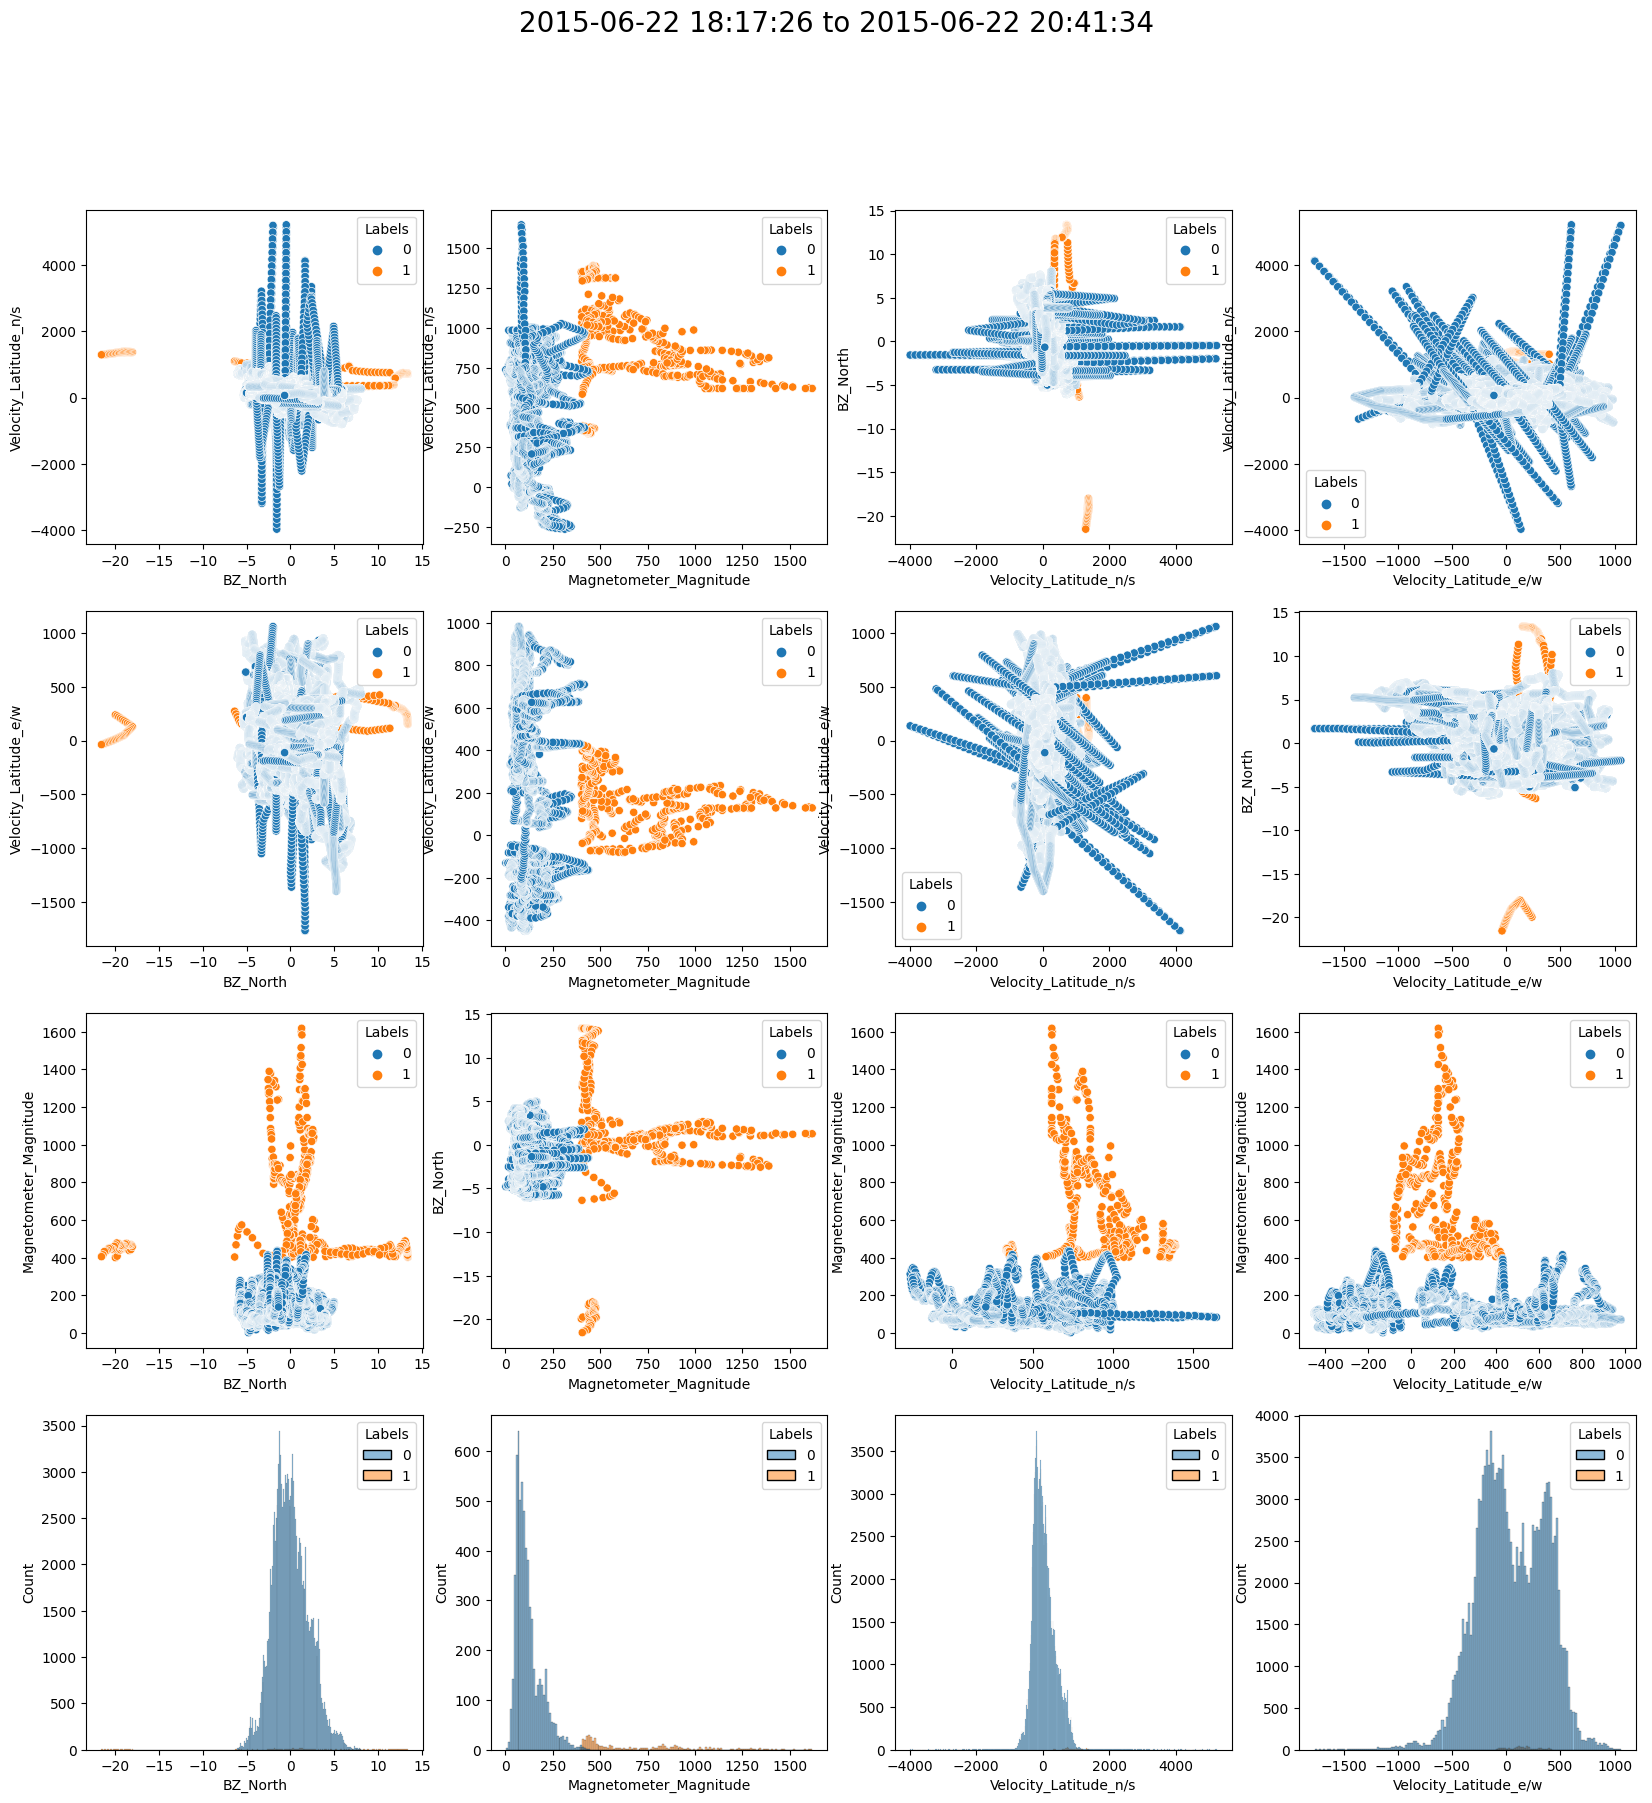

In [20]:
df = df_2015_06_22_1
df2 = pd.read_csv('2015-06-08.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],df2]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()
# sns.histplot(ax=axarr[0][0:3],data=df3,x='BZ_North',hue='Labels')
fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')


<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

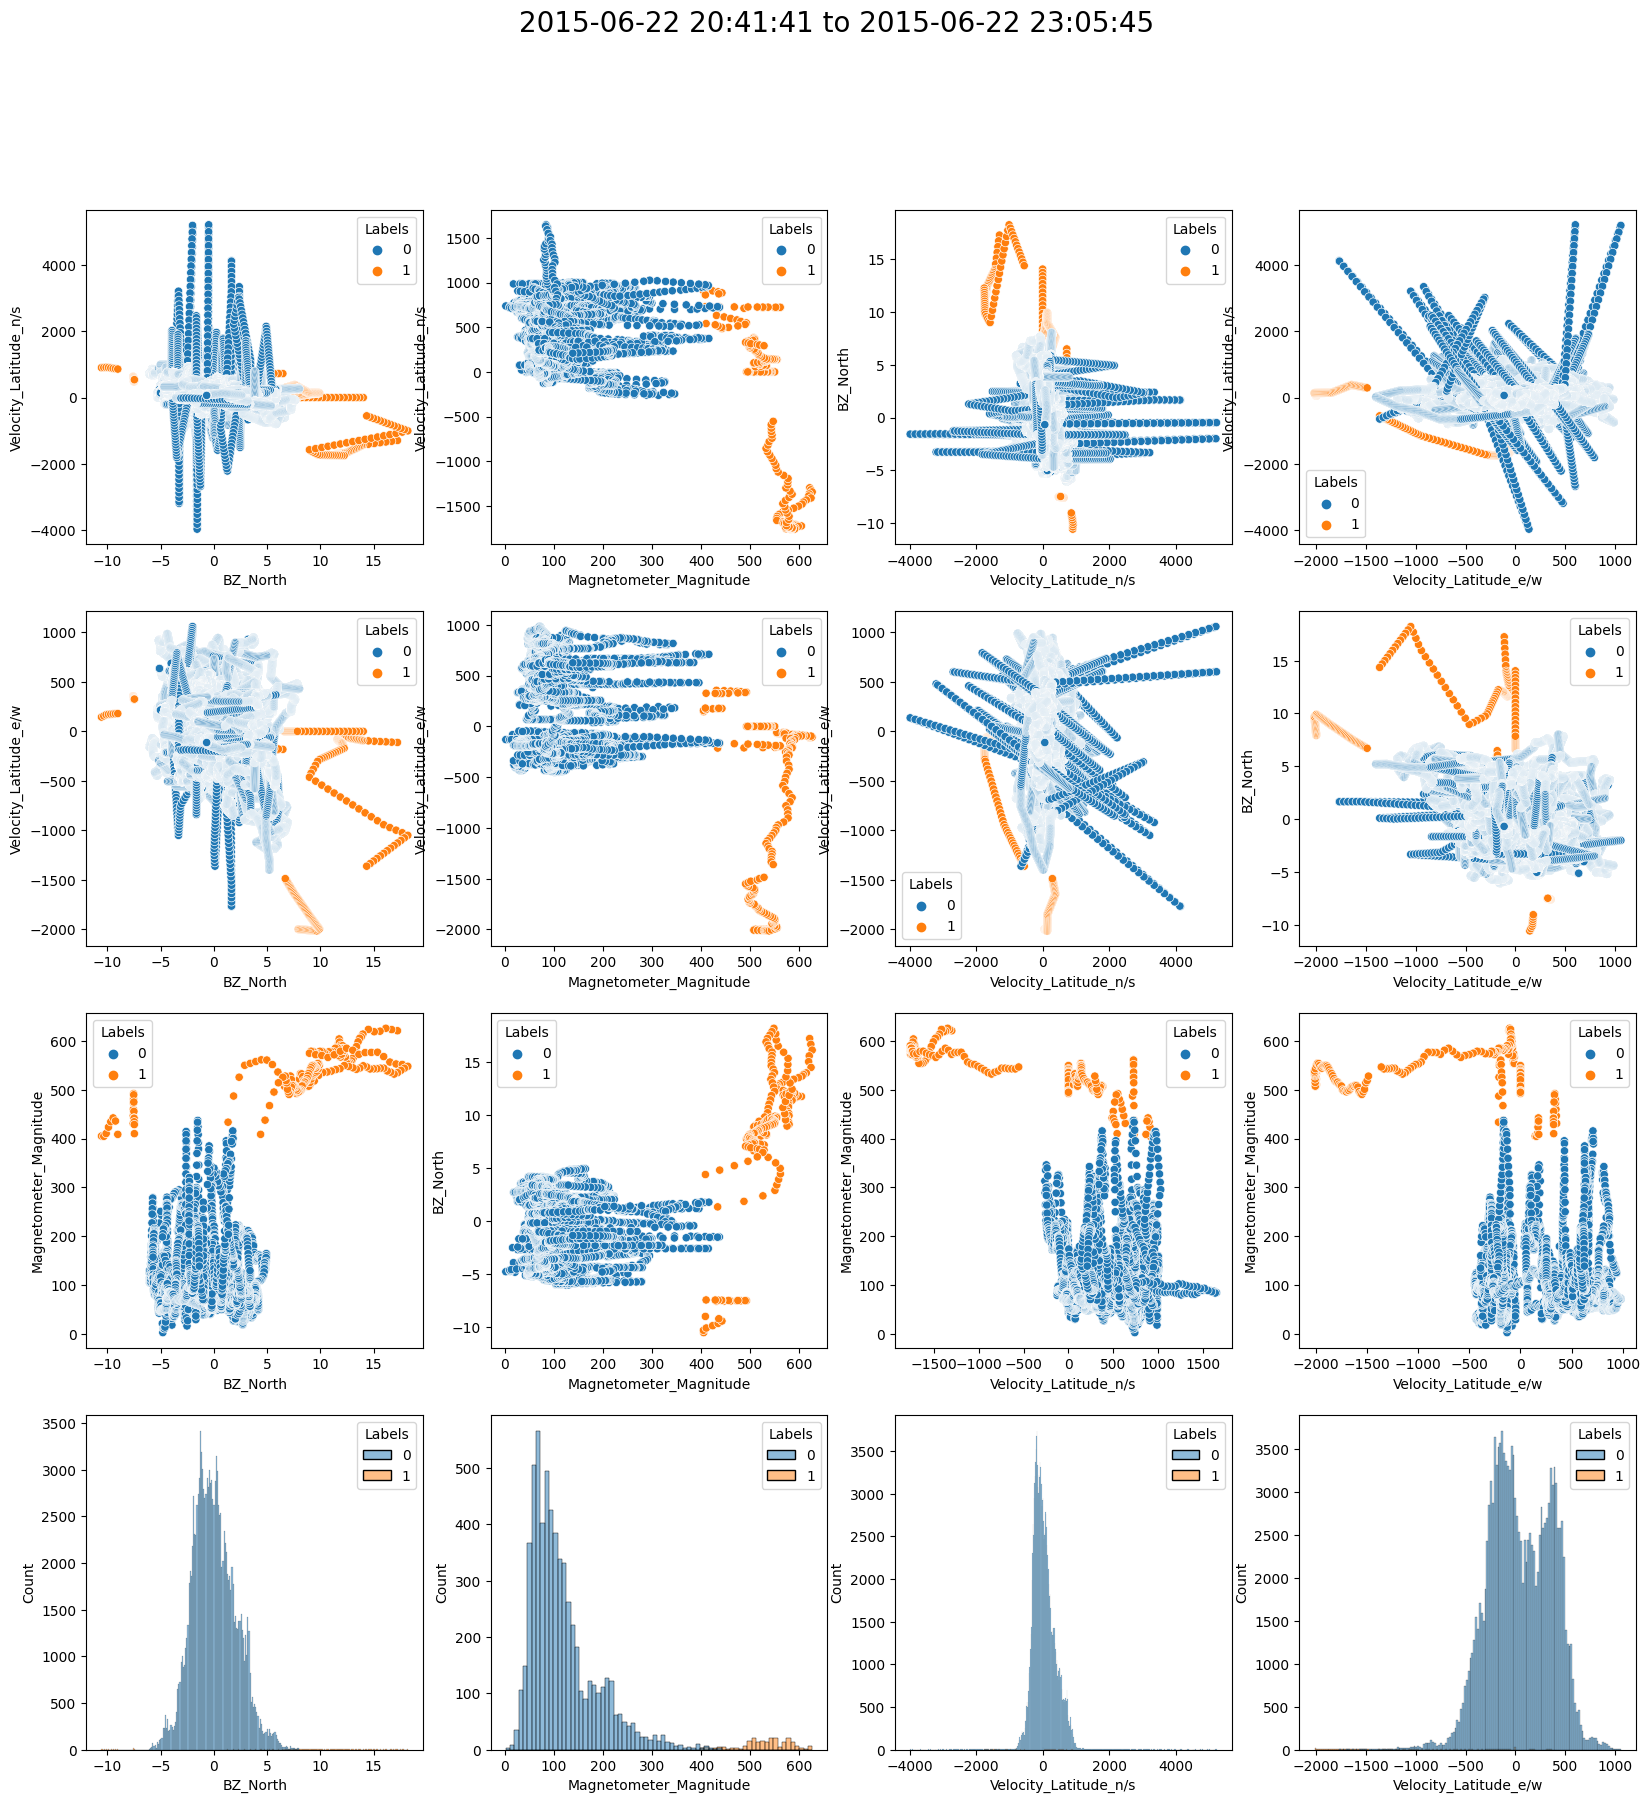

In [21]:
df = df_2015_06_22_2
df2 = pd.read_csv('2015-06-08.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],df2]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()
# sns.histplot(ax=axarr[0][0:3],data=df3,x='BZ_North',hue='Labels')
fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')


<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

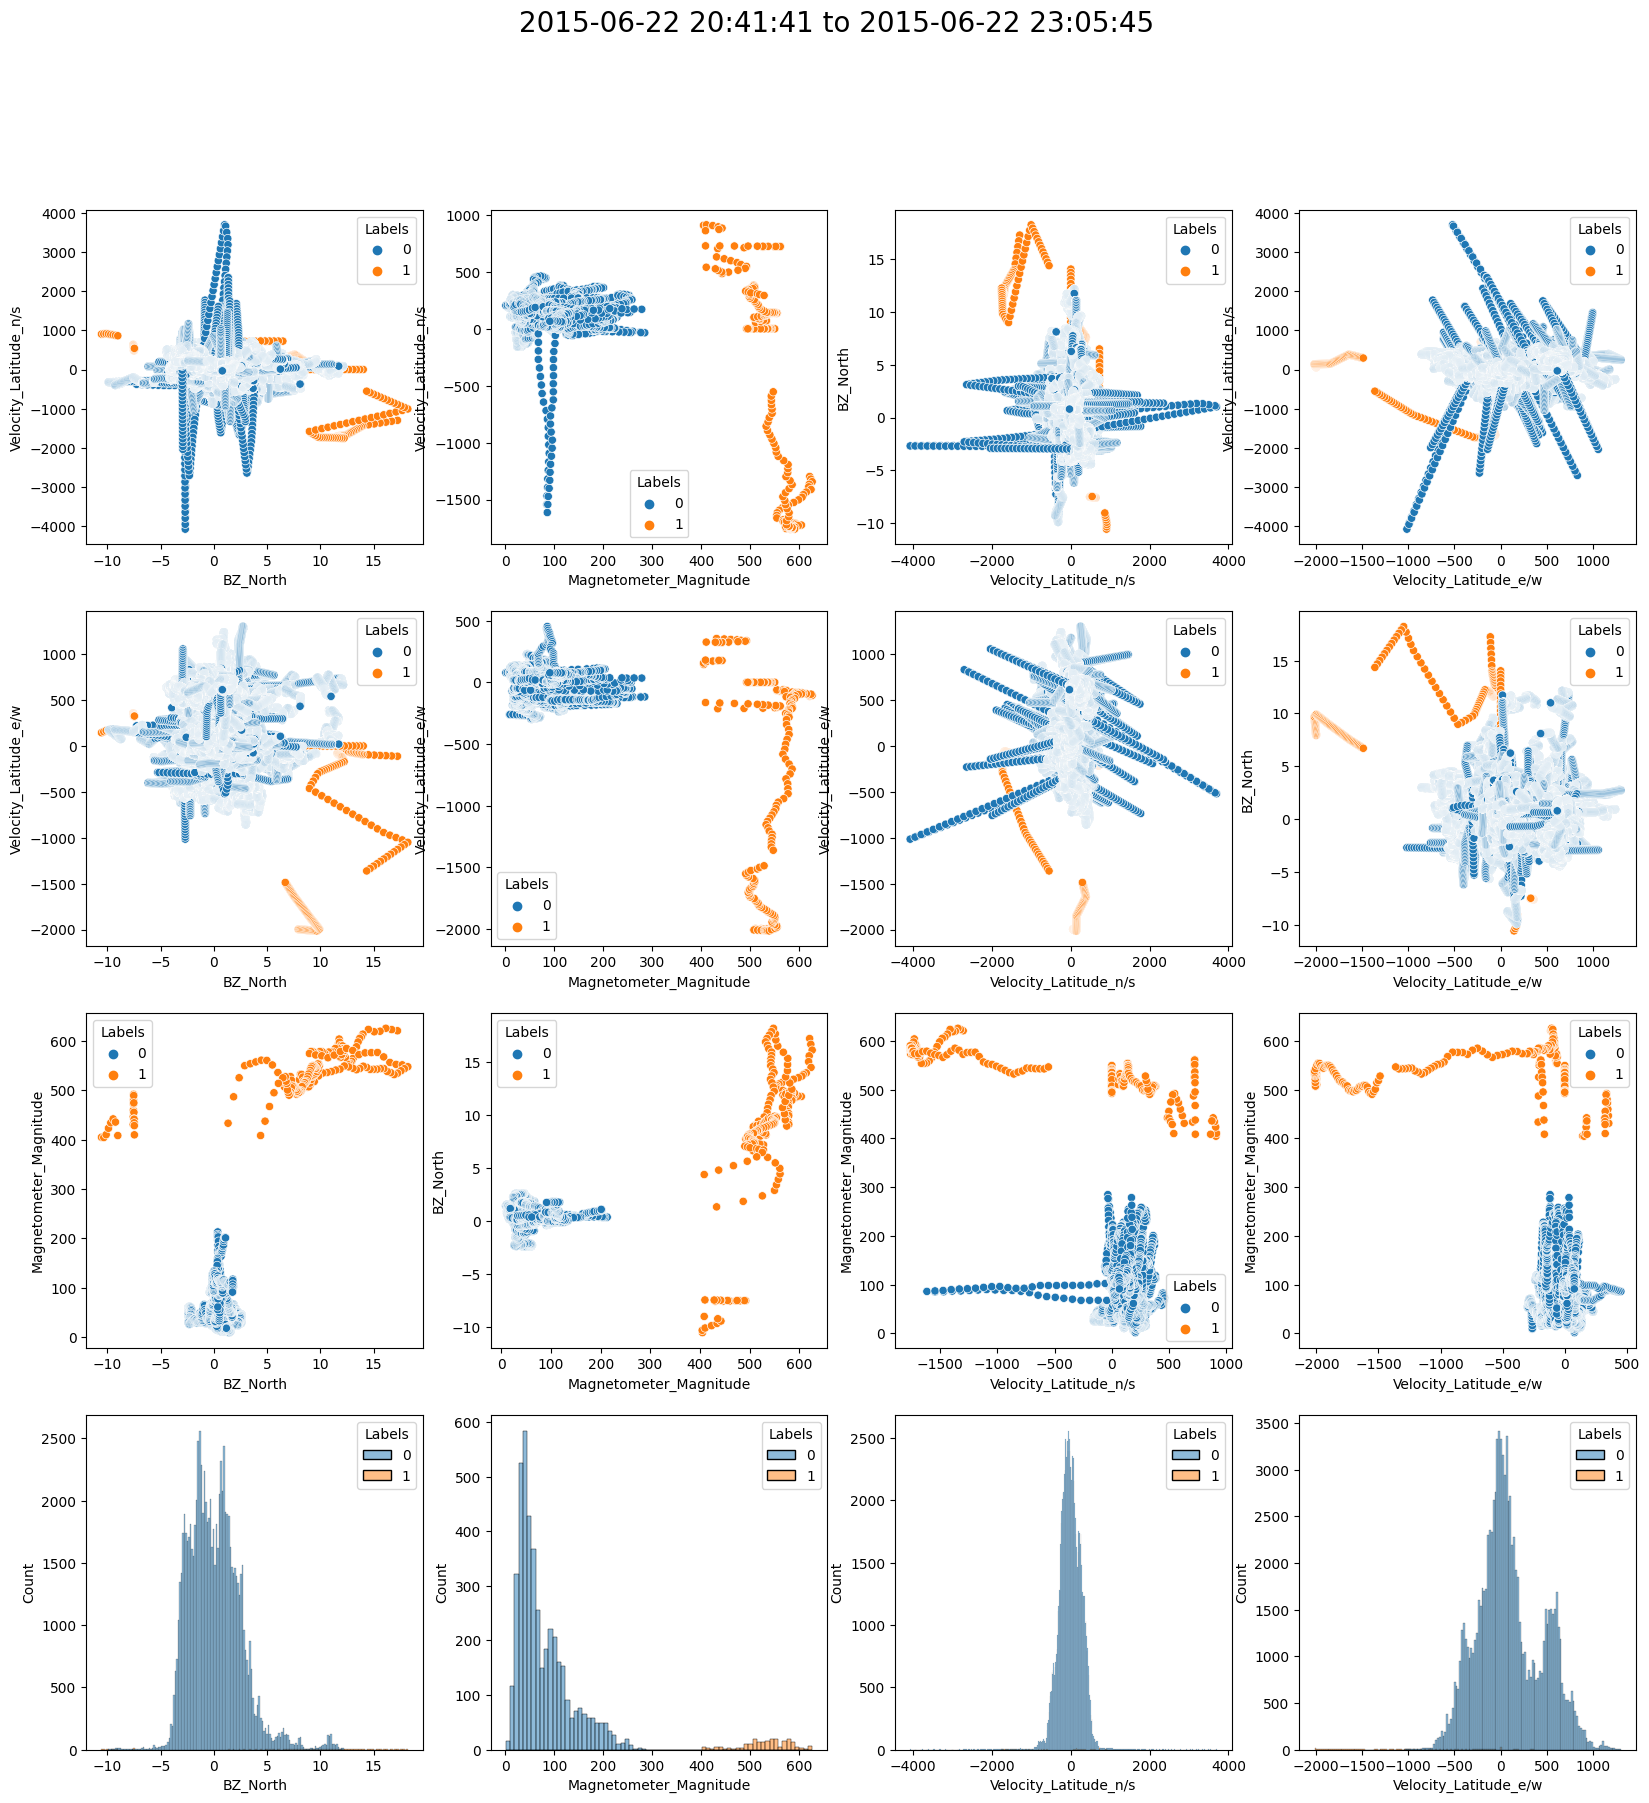

In [22]:
df = df_2015_06_22_2
df2 = pd.read_csv('2016-07-01.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],df2]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()

fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

In [23]:
# df = df_2017_05_17_1
# df2 = pd.read_csv('2017-04-27.csv',usecols=cols)
# print(df.columns)
# print(df2.columns)
# frames = [df[df['Labels']==1],df2]
# df3 = pd.concat(frames)
# print(df3.columns)
# df3 = df3.reset_index()
# # sns.histplot(ax=axarr[0][0:3],data=df3,x='BZ_North',hue='Labels')
# fig,axarr = plt.subplots(4,4,figsize=(20, 20))
# fig.suptitle(str(df2['Date'].iloc[0])[0:19]+' to ' + str(df2['Date'].iloc[-1])[0:19], fontsize=20)
# sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

# sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
# sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

# sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
# sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
# sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

# sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
# sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
# sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
# sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

In [24]:
frames = [
    d1, # 2013-06-10
    # d2, # 2014-03-31
    d3, # 2015-06-08
    d4, # 2016-07-01
    # d5, # 2017-04-27
]
Complete = pd.concat(frames)

In [35]:
df = df_original
# df2 = pd.read_csv('2016-07-01.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],Complete]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()
df3.to_csv('ClusterData2.csv')
dropindices = df3[df3['Labels'] == 0].index.tolist()
dropindices = random.sample(dropindices, int(len(dropindices) * 0.7))
df3 = df3.drop(dropindices)
df3.describe()

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels', 'index', 'Magnetometer_North', 'Magnetometer_East',
       'Magnetometer_Z'],
      dtype='object')


level_0      BZ_North  Magnetometer_Magnitude  \
count   77437.000000  70430.000000             4397.000000   
mean    63130.260276      0.134771              239.385582   
std     40228.615311      2.382320              259.113328   
min         1.000000    -21.537461                5.005996   
25%     28484.000000     -1.461089               65.132327   
50%     60865.000000     -0.077078              114.922061   
75%     93292.000000      1.519246              424.635503   
max    148040.000000     18.218735             1617.603740   

       Magnetometer_Theta  Magnetometer_Phi  Velocity_Latitude_n/s  \
count         4397.000000       4397.000000           77376.000000   
mean            -0.052856          1.462646              26.005104   
std              0.871299          0.640129             339.162702   
min             -1.570796          0.020633           -3981.724133   
25%             -0.790863          1.067168            -187.907470   
50%             -0.011202          1.367717              -9.867786   
75%              0.622778          1.876573             210.128091   
max              1.567122          3.136918            5160.653271   

       Velocity_Latitude_e/w        Labels          index  Magnetometer_North  \
count           77376.000000  77437.000000   76240.000000         3200.000000   
mean               64.565664      0.015458   63956.127256           11.602219   
std               332.974120      0.123365   39989.856020           69.036556   
min             -2014.640928      0.000000       1.000000         -264.200000   
25%              -161.149767      0.000000   29909.750000          -18.825000   
50%                34.623965      0.000000   61888.500000           18.100000   
75%               311.898076      0.000000   93770.250000           46.800000   
max              1293.403967      1.000000  148040.000000          405.400000   

       Magnetometer_East  Magnetometer_Z  
count        3200.000000      3200.00000  
mean          -31.831406        26.76050  
std            63.679735        58.70798  
min          -334.100000      -200.20000  
25%           -65.000000         3.40000  
50%           -30.850000        20.40000  
75%             5.725000        42.50000  
max           209.800000       348.00000

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

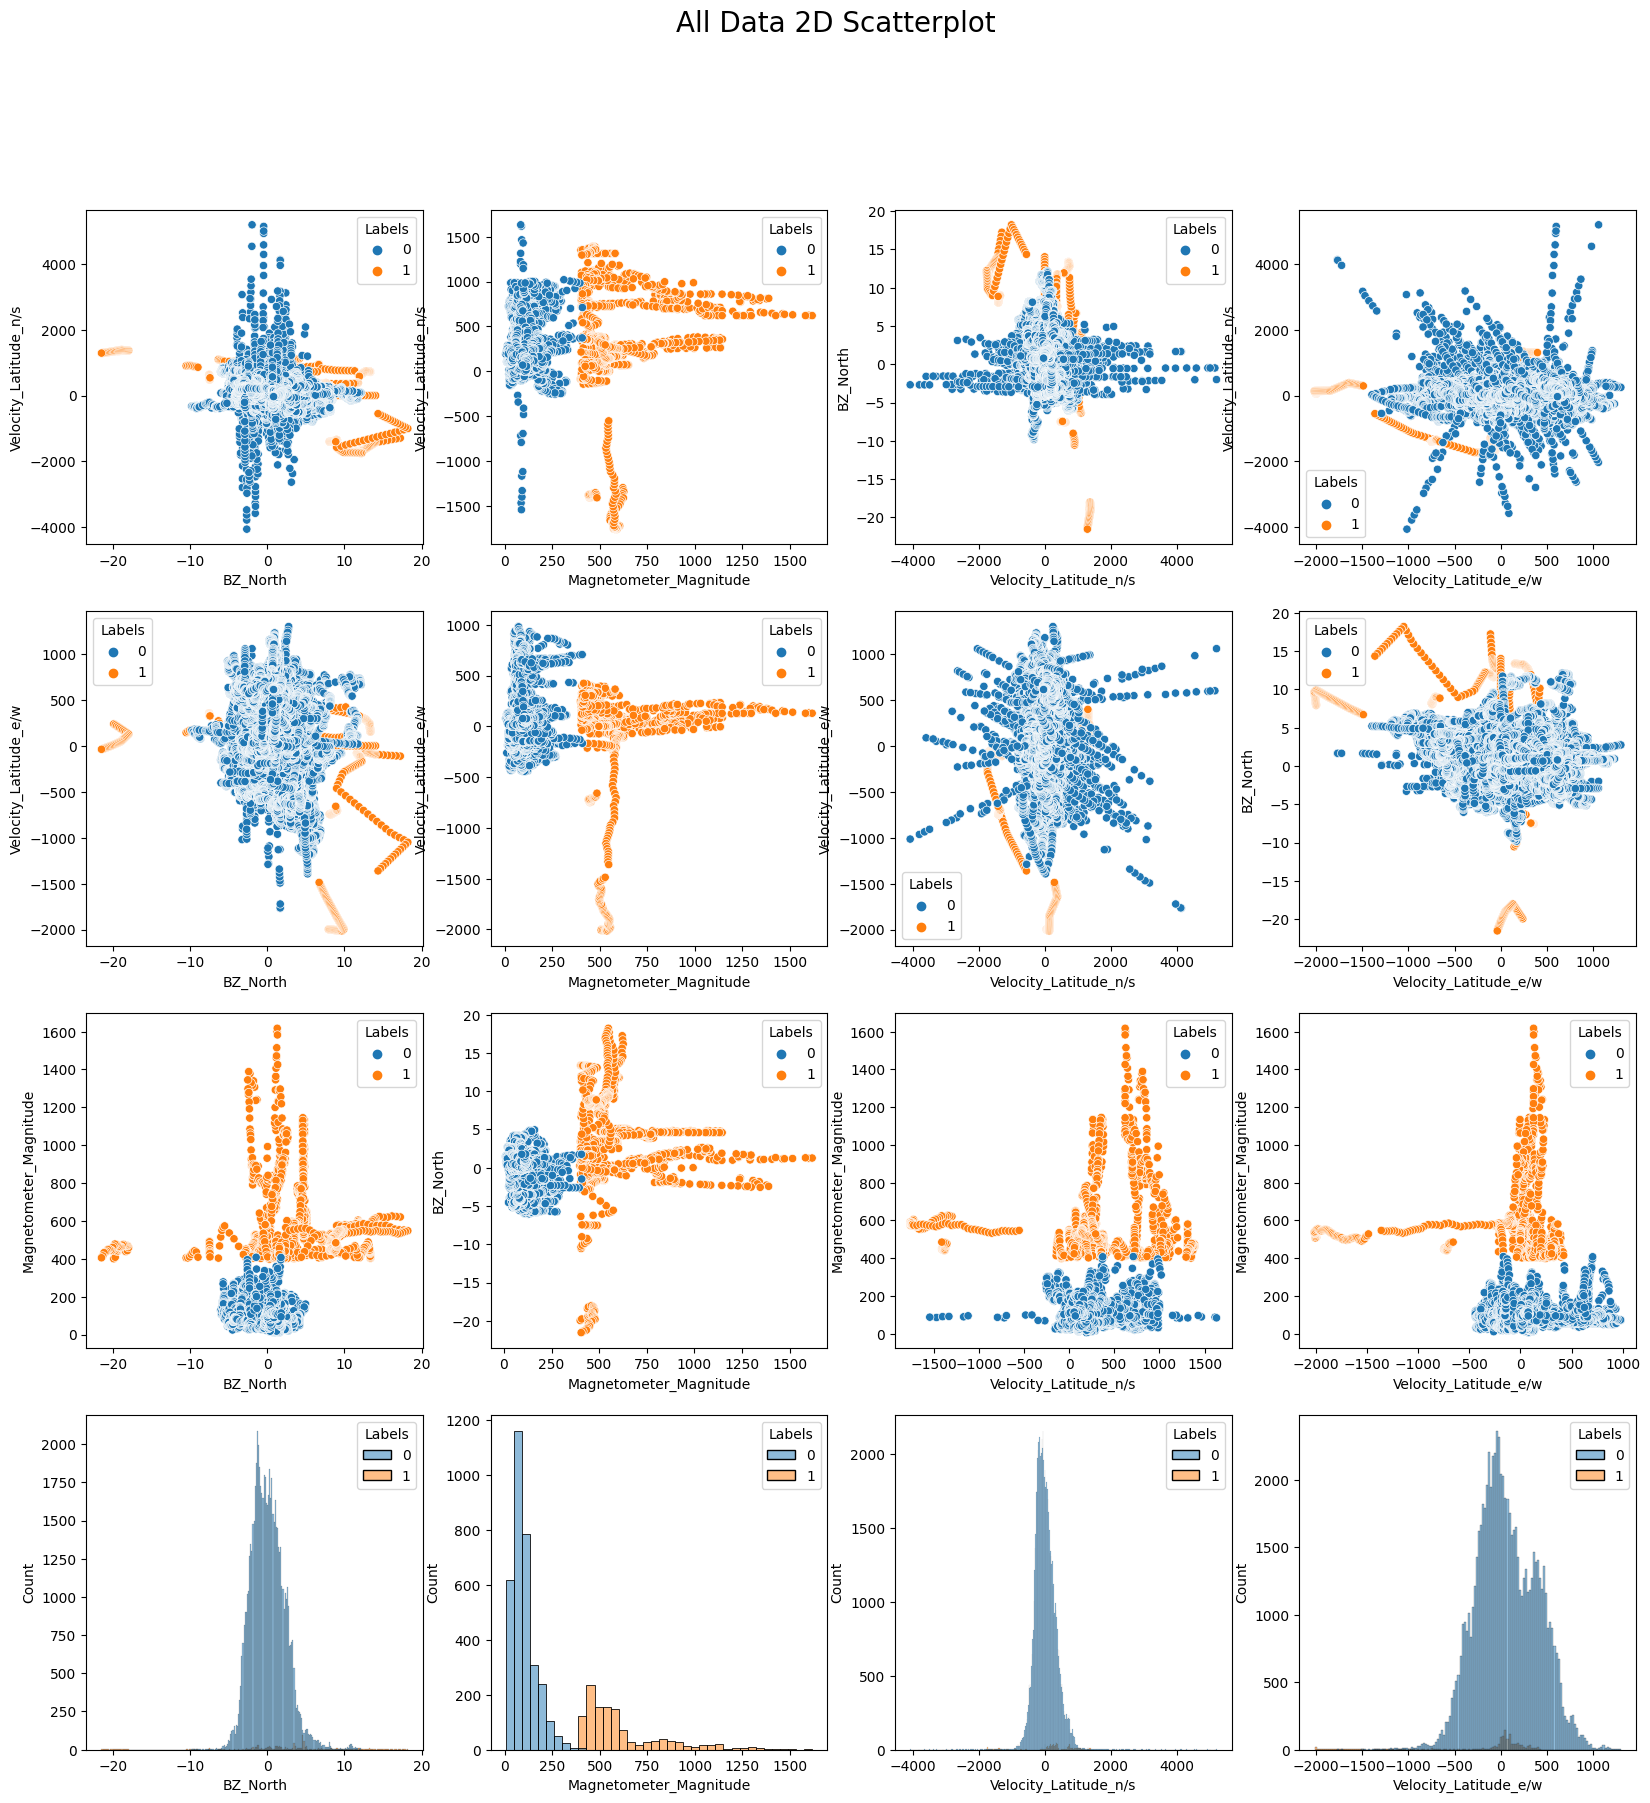

In [26]:
fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle('All Data 2D Scatterplot', fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

In [27]:
FBPresent = df3[df3['Labels'] == 1]
FBPresent.describe()

level_0     BZ_North  Magnetometer_Magnitude  Magnetometer_Theta  \
count   1197.000000  1197.000000             1197.000000         1197.000000   
mean   10528.674185     2.983014              610.386351            0.050458   
std     5279.931032     6.124952              216.271333            0.759763   
min     1214.000000   -21.537461              398.135266           -1.570545   
25%     6749.000000     0.143808              456.004474           -0.507309   
50%    10897.000000     3.401745              536.639041            0.025281   
75%    13095.000000     5.095296              656.368174            0.572851   
max    28199.000000    18.218735             1617.603740            1.566038   

       Magnetometer_Phi  Velocity_Latitude_n/s  Velocity_Latitude_e/w  Labels  \
count       1197.000000            1197.000000            1197.000000  1197.0   
mean           1.959450             322.415141             -46.923578     1.0   
std            0.682260             672.910276             481.135719     0.0   
min            0.490731           -1760.493261           -2014.640928     1.0   
25%            1.285160             146.513621               0.000000     1.0   
50%            2.095563             337.938297              59.402363     1.0   
75%            2.529608             757.871251             156.297243     1.0   
max            3.136918            1389.826919             423.554517     1.0   

       index  Magnetometer_North  Magnetometer_East  Magnetometer_Z  
count    0.0                 0.0                0.0             0.0  
mean     NaN                 NaN                NaN             NaN  
std      NaN                 NaN                NaN             NaN  
min      NaN                 NaN                NaN             NaN  
25%      NaN                 NaN                NaN             NaN  
50%      NaN                 NaN                NaN             NaN  
75%      NaN                 NaN                NaN             NaN  
max      NaN                 NaN                NaN             NaN

<Axes: xlabel='BZ_North', ylabel='Count'>

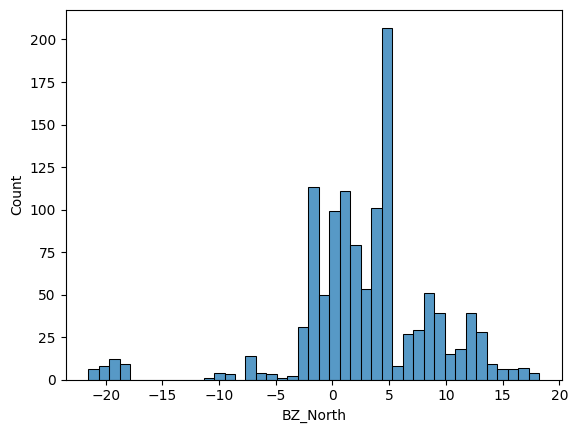

In [28]:
sns.histplot(data=FBPresent,x='BZ_North')

<Axes: ylabel='Count'>

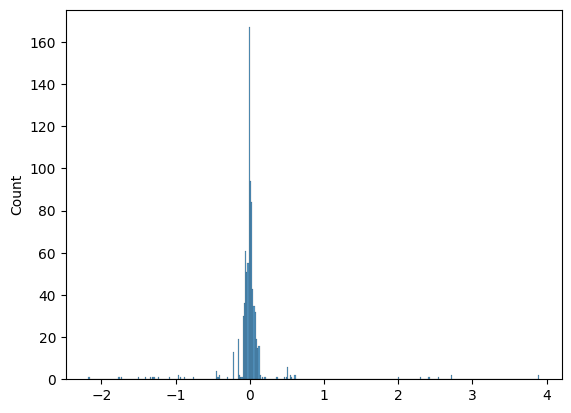

In [29]:
FBPresent_data = FBPresent.drop(columns='Date')
smallBZ_North = FBPresent_data.loc[(FBPresent_data['BZ_North']<5) & (FBPresent_data['BZ_North']>-5)]
largeBZ_North = FBPresent_data.loc[(FBPresent_data['BZ_North']>=5) | (FBPresent_data['BZ_North']<=-5)]
grad_BZ_North_small = np.gradient(smallBZ_North['BZ_North'])
grad_BZ_North_large = np.gradient(largeBZ_North['BZ_North'])

# fig,axarr = plt.subplots(2,1, figsize=(4,4),sharex=True)
# sns.histplot(ax = axarr[0], data=grad_BZ_North_small)
# sns.histplot(ax = axarr[1], data=grad_BZ_North_large)

sns.histplot(data=grad_BZ_North_small)

<Axes: ylabel='Count'>

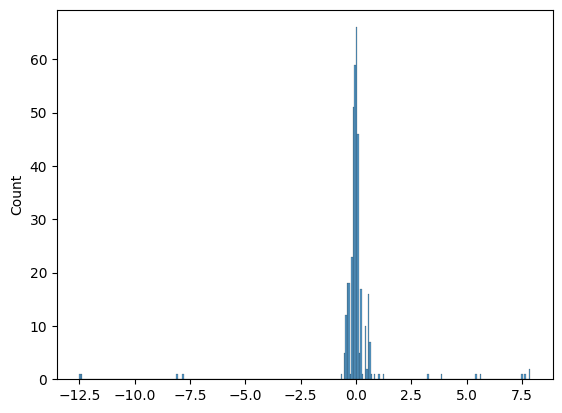

In [30]:
sns.histplot(data=grad_BZ_North_large)

In [31]:
frames = [
    d1, # 2013-06-10
    # d2, # 2014-03-31
    d3, # 2015-06-08
    d4, # 2016-07-01
    # d5, # 2017-04-27
]
Complete = pd.concat(frames)
origframes = [
    df_2014_09_11_1,
    df_2015_06_22_2,
    df_2017_05_17_1
    ]
orig = pd.concat(origframes)

df = orig
# df2 = pd.read_csv('2016-07-01.csv',usecols=cols)
print(df.columns)
print(df2.columns)
frames = [df[df['Labels']==1],Complete]
df3 = pd.concat(frames)
print(df3.columns)
df3 = df3.reset_index()

dropindices = df3[df3['Labels'] == 0].index.tolist()
dropindices = random.sample(dropindices, int(len(dropindices) * 0.95))
df3 = df3.drop(dropindices)
df3.describe()
df3.to_csv('ClusterData.csv')

Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Magnetometer_Magnitude', 'Magnetometer_Theta', 'Magnetometer_Phi',
       'Labels'],
      dtype='object')
Index(['Date', 'BZ_North', 'Magnetometer_Magnitude', 'Magnetometer_Theta',
       'Magnetometer_Phi', 'Velocity_Latitude_n/s', 'Velocity_Latitude_e/w',
       'Labels', 'index', 'Magnetometer_North', 'Magnetometer_East',
       'Magnetometer_Z'],
      dtype='object')


<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

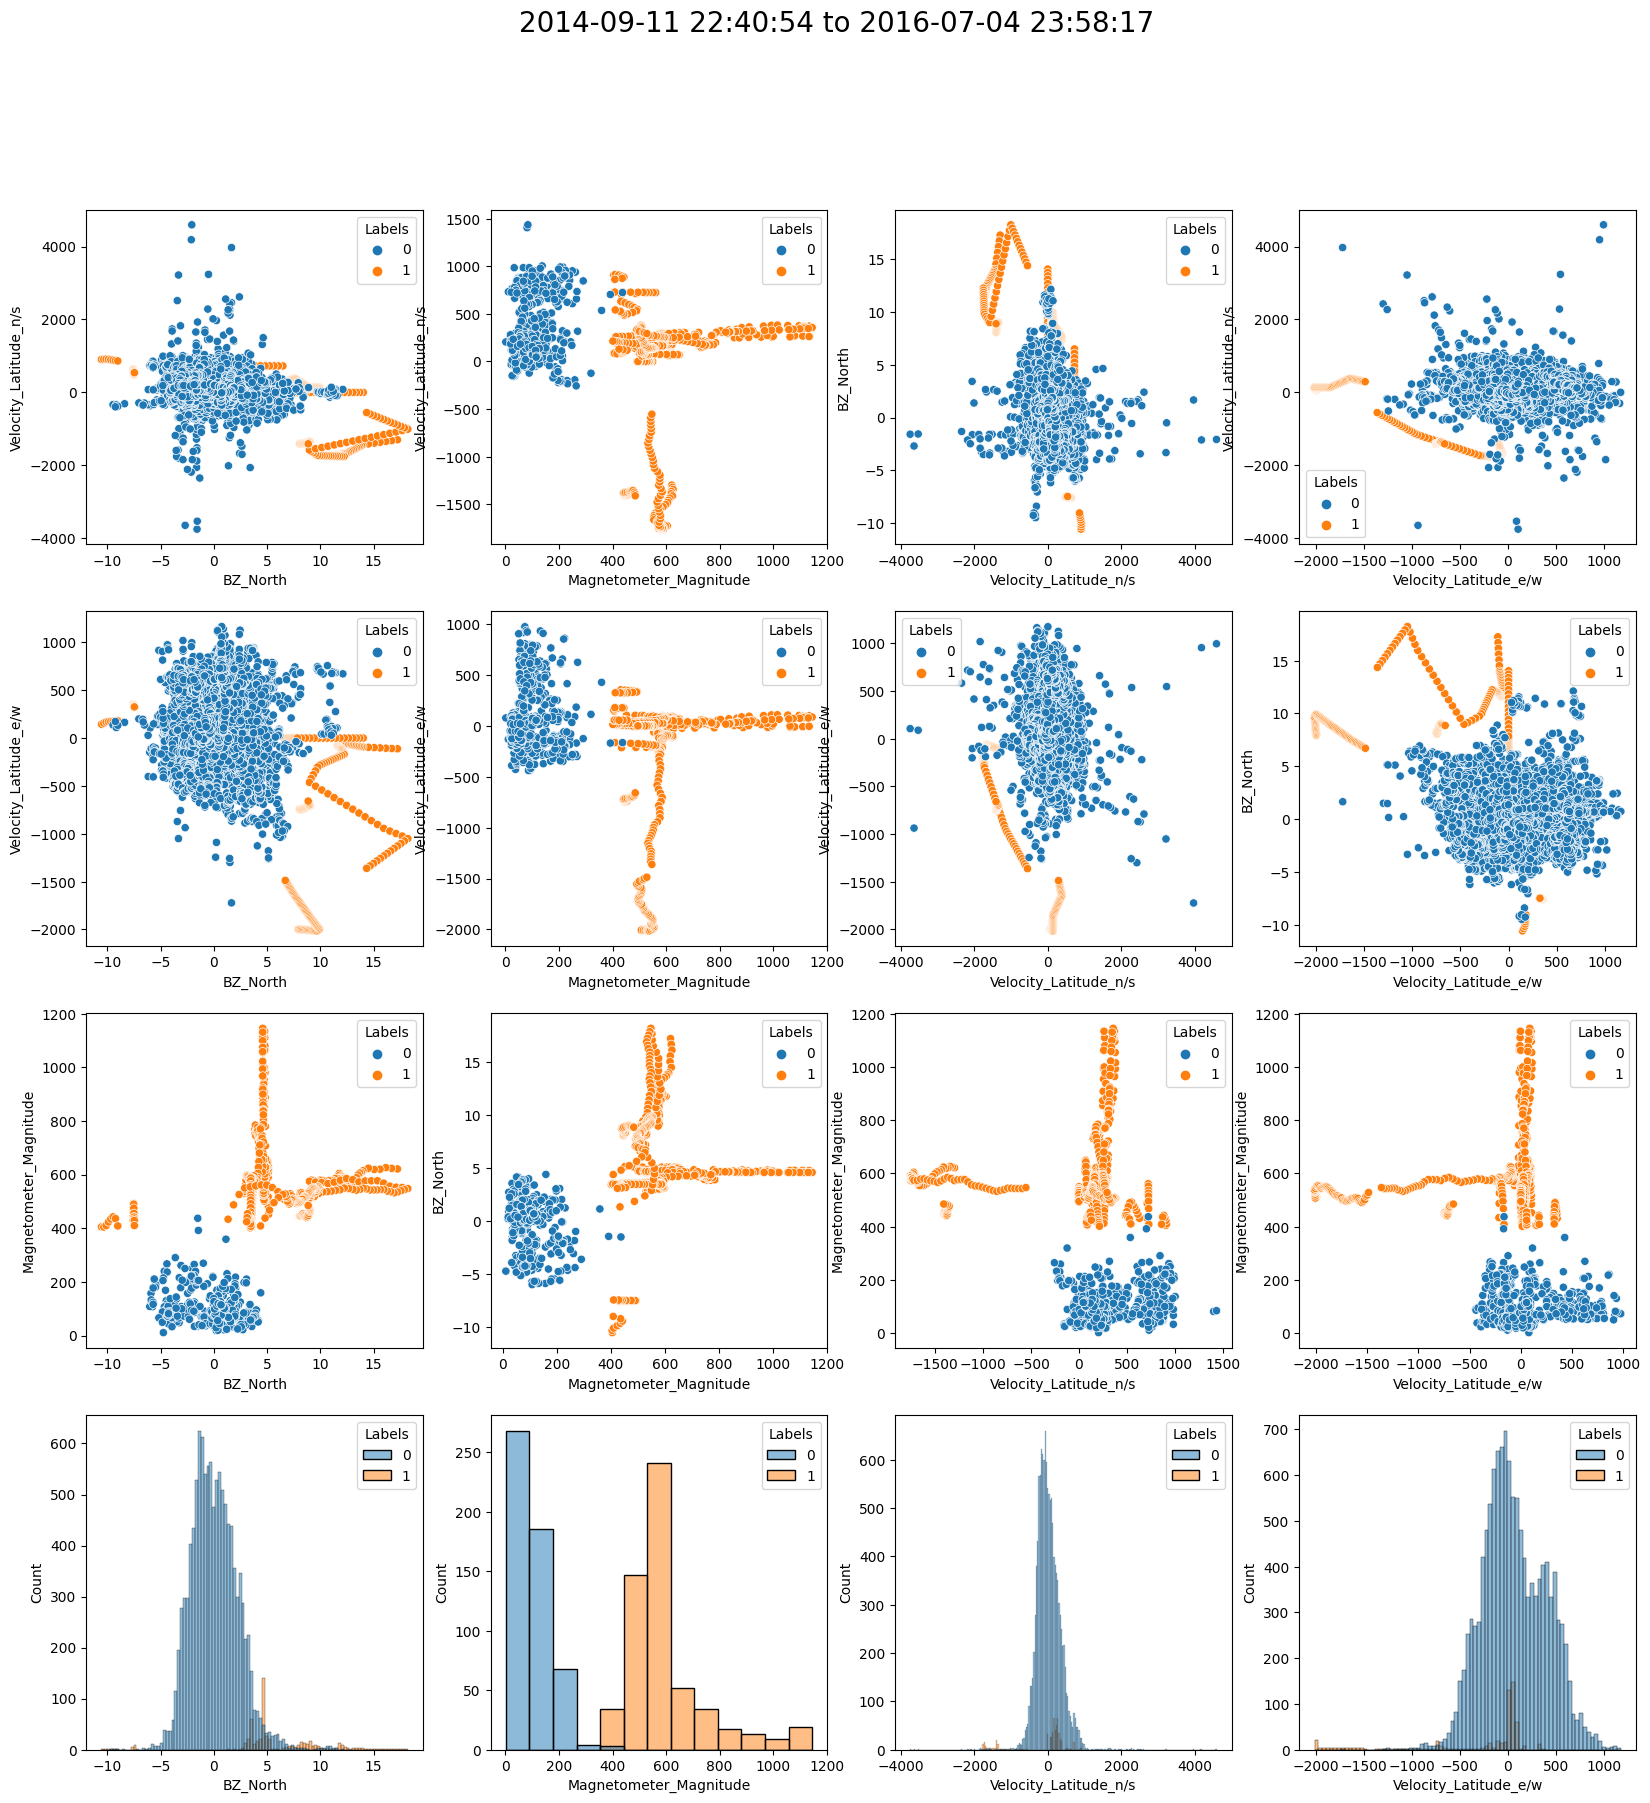

In [32]:
fig,axarr = plt.subplots(4,4,figsize=(20, 20))
fig.suptitle(str(df3['Date'].iloc[0])[0:19]+' to ' + str(df3['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df3,x='BZ_North',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][0],data=df3,x='BZ_North',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][0],data=df3,x='BZ_North',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][0],data=df3,x='BZ_North',hue='Labels')

sns.scatterplot(ax=axarr[0][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][1],data=df3,x='Magnetometer_Magnitude',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][1],data=df3,x='Magnetometer_Magnitude',y='BZ_North',hue='Labels')
sns.histplot(ax=axarr[3][1],data=df3,x='Magnetometer_Magnitude',hue='Labels')

sns.scatterplot(ax=axarr[0][2],data=df3,x='Velocity_Latitude_n/s',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[1][2],data=df3,x='Velocity_Latitude_n/s',y='Velocity_Latitude_e/w',hue='Labels')
sns.scatterplot(ax=axarr[2][2],data=df3,x='Velocity_Latitude_n/s',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][2],data=df3,x='Velocity_Latitude_n/s',hue='Labels')

sns.scatterplot(ax=axarr[0][3],data=df3,x='Velocity_Latitude_e/w',y='Velocity_Latitude_n/s',hue='Labels')
sns.scatterplot(ax=axarr[1][3],data=df3,x='Velocity_Latitude_e/w',y='BZ_North',hue='Labels')
sns.scatterplot(ax=axarr[2][3],data=df3,x='Velocity_Latitude_e/w',y='Magnetometer_Magnitude',hue='Labels')
sns.histplot(ax=axarr[3][3],data=df3,x='Velocity_Latitude_e/w',hue='Labels')

<Axes: xlabel='BZ_North', ylabel='Count'>

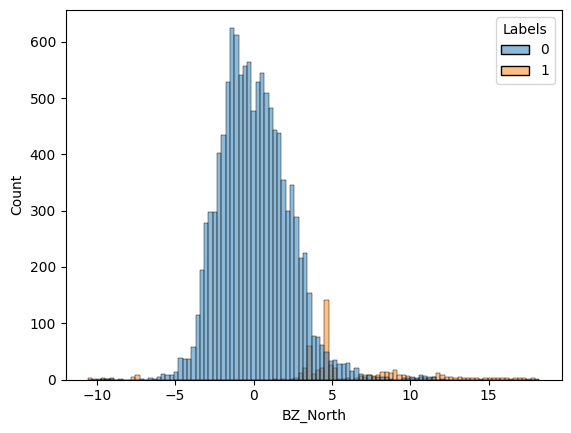

In [33]:
sns.histplot(data=df3,x='BZ_North',hue='Labels')

<Axes: xlabel='Velocity_Latitude_n/s', ylabel='Count'>

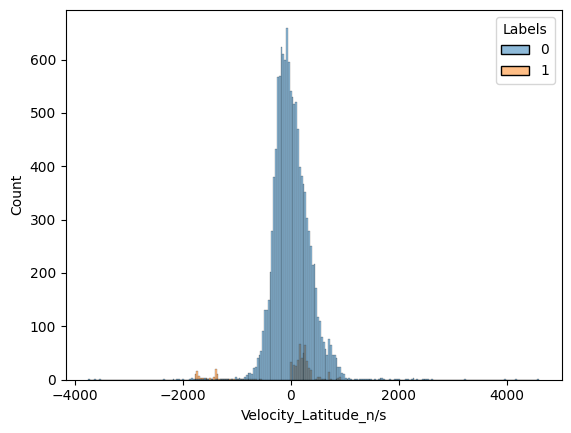

In [34]:
sns.histplot(data=df3,x='Velocity_Latitude_n/s',hue='Labels')